<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**02 Sampling & Quantization**

---

> **204383 Image Processing**

> **Kasidis Torcharoen (610510531)**"

In [1]:
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title { display-mode: "form" }

def image_summary(image, labels=['R', 'G', 'B']):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

def ImageShow(image):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image/255.0)
    ax.axis('off')
    plt.show()
    
def ImageShowRGB(image):

    fig, ax = plt.subplots(1, 4, figsize=(20, 30))

    ax[0].imshow(image/255.0)
    ax[0].axis('off')
    ax[0].set_title("Original RGB")

    for i, lab in enumerate(['R','G','B']):
        temp = np.zeros(image.shape)
        temp[:,:,i] = image[:,:,i]
        ax[i+1].imshow(temp/255.0) 
        ax[i+1].axis("off")
        ax[i+1].set_title(lab)
        
    plt.show()

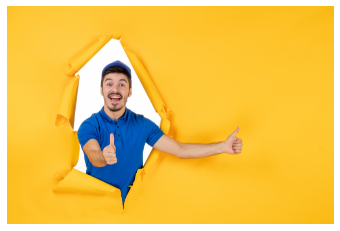

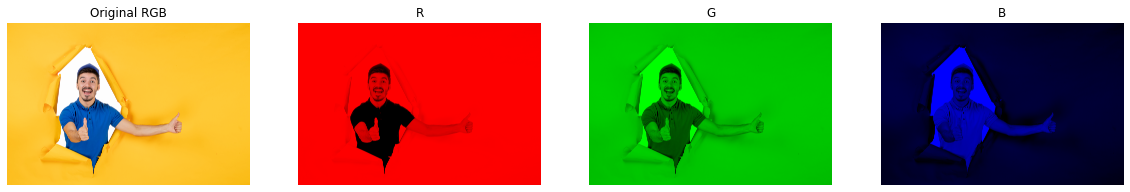

--------------
Image Details:
--------------
Image dimensions: (3733, 5600, 3)
Channels:
R : min=0.0000, max=255.0000
G : min=0.0000, max=255.0000
B : min=0.0000, max=255.0000


In [28]:
#@title Source { run: "auto", vertical-output: true }

URL = "https://raw.githubusercontent.com/tackulus/204383/main/image/0202.jpg" #@param {type:"string"}

image = imread(URL)
ImageShow(image)
ImageShowRGB(image)
image_summary(image)

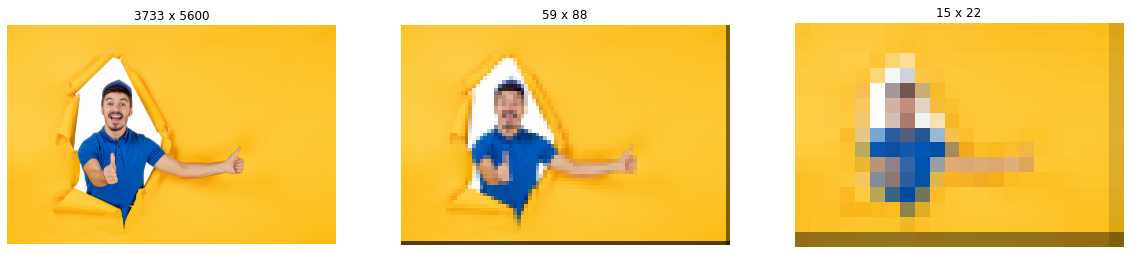

In [29]:
#@title Sampling { vertical-output: true, display-mode: "form" }

from skimage.transform import downscale_local_mean

factors = [1, 64, 256] #@param
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    sub_image = downscale_local_mean(image,
                    factors=(factor, factor, 1)).astype(int)
    ax.axis('off')
    ax.imshow(sub_image)
    ax.set_title(f'{sub_image.shape[0]} x {sub_image.shape[1]}')

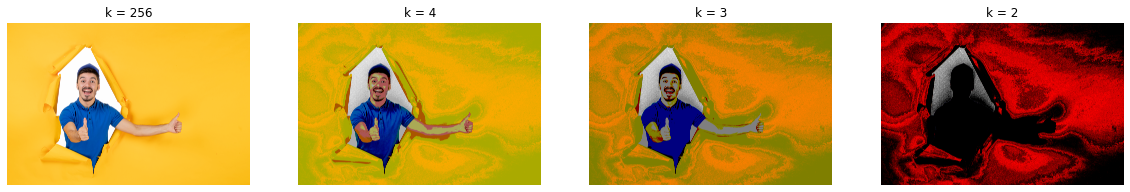

In [30]:
#@title Quantization { vertical-output: true, display-mode: "form" }

factors = [256, 4, 3, 2] #@param
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, image.max(), k)
    sub_image = np.digitize(image, bins)
    sub_image = ( np.vectorize(bins.tolist().__getitem__)
                    (sub_image-1).astype(int))
    ax.axis('off')
    ax.imshow(sub_image)
    ax.set_title(f'k = {k}')